In [153]:
import pandas as pd
import warnings

import seaborn as sns
import numpy  as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
#import seaborn.apionly as sns
from scipy import stats

In [154]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score, plot_confusion_matrix

In [155]:
data=pd.read_csv("C:\\Users\\NoteBooK\Desktop\graduation project data\stroke_data.csv")

In [33]:
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [34]:
data.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [36]:
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [37]:
data["stroke"].value_counts(normalize=True)

1    0.500122
0    0.499878
Name: stroke, dtype: float64

In [10]:
corr=data.corr()

In [14]:
corr["stroke"].sort_values()

sex                 -0.111036
Residence_type       0.011682
bmi                  0.018326
work_type            0.026494
age                  0.058534
smoking_status       0.068368
ever_married         0.181656
heart_disease        0.223930
hypertension         0.257182
avg_glucose_level    0.265452
stroke               1.000000
Name: stroke, dtype: float64

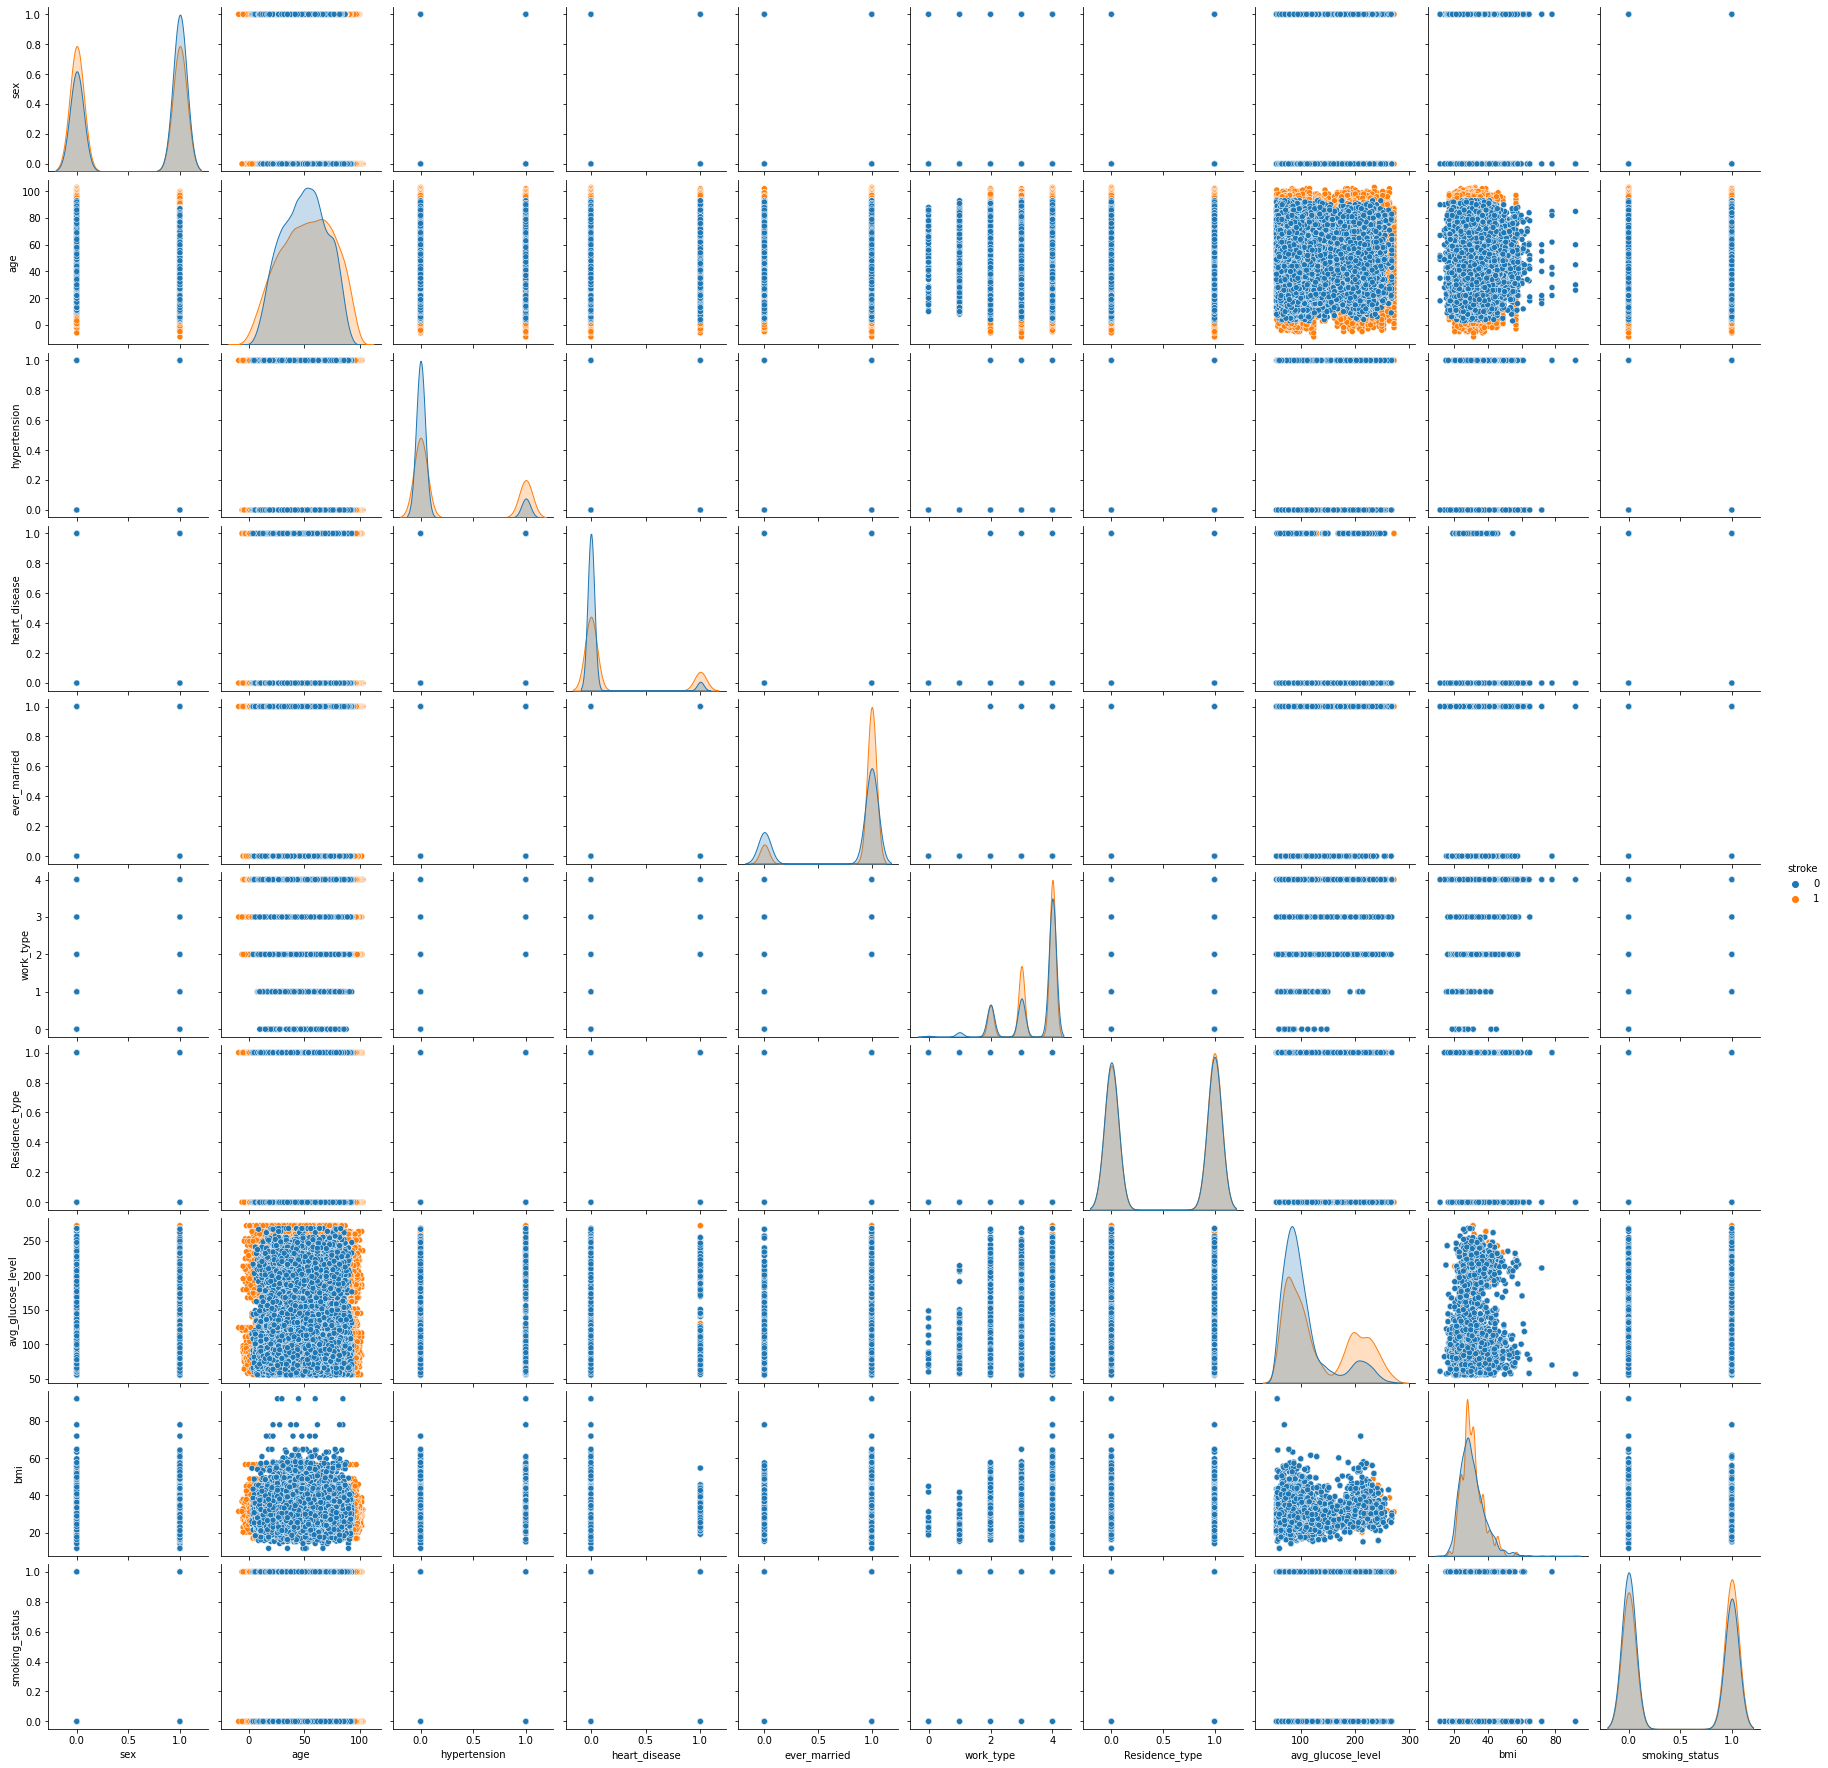

In [17]:
#sns.pairplot(data,hue="stroke")

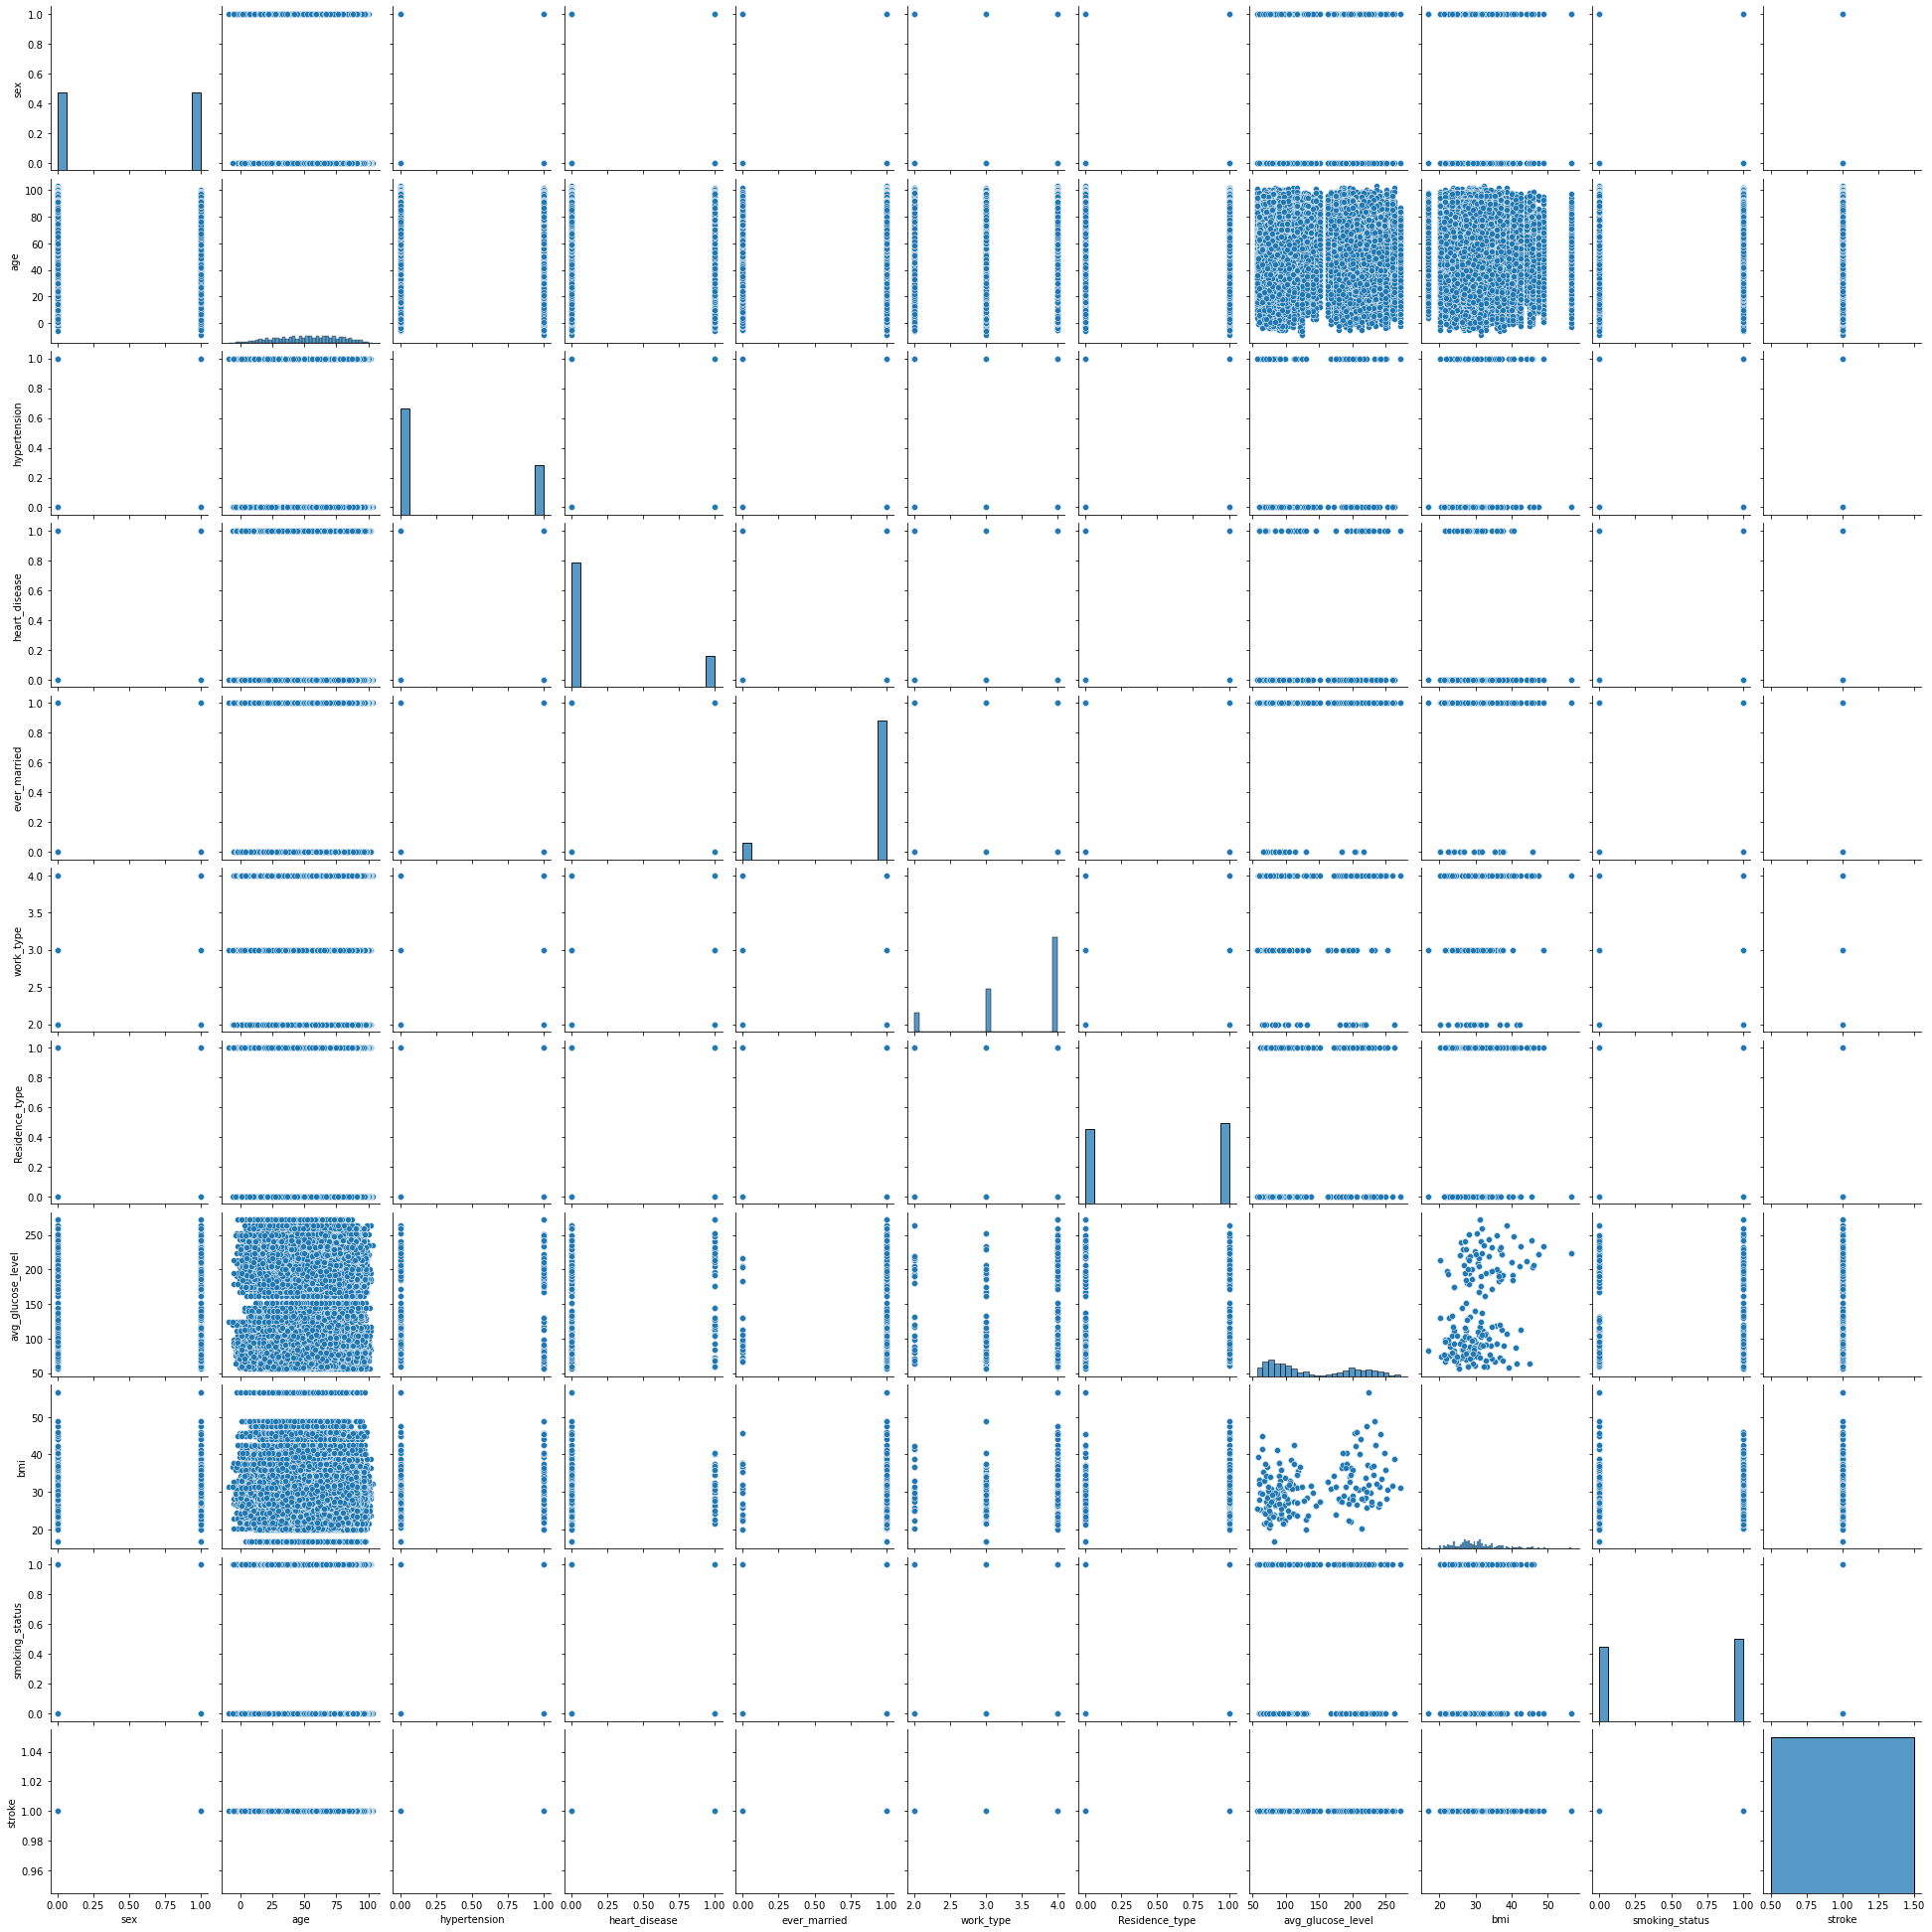

In [18]:
mask=data["stroke"]==1
have_stroke=data[mask]
sns.pairplot(have_stroke)

In [ ]:
sns.swarmplot(x=data_vis["stroke"],y=data_vis["age"],hue=data_vis["sex"],orient="v")

F:\Newfolder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

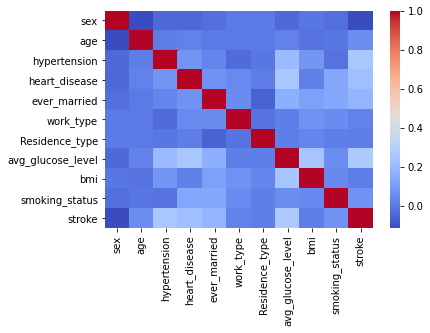

In [20]:
corr=data.corr()
sns.heatmap(corr,cmap="coolwarm")

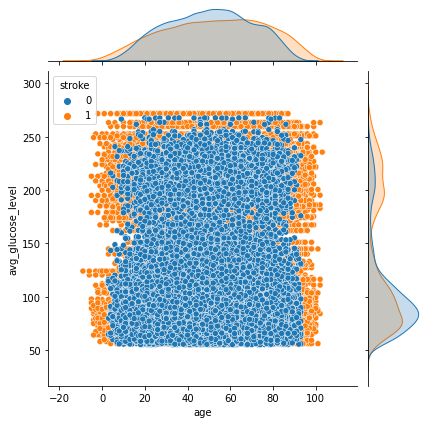

In [25]:
sns.jointplot(x=data["age"],y=data["avg_glucose_level"],hue=data["stroke"])

In [4]:
data.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [156]:
from category_encoders import OrdinalEncoder
from IPython.display import VimeoVideo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline


In [39]:
data.dropna(inplace=True)

In [40]:
data_vis = data.copy()

In [159]:
data_vis.sex[data_vis['sex'] == 0] = 'Female'
data_vis.sex[data_vis['sex'] == 1] = 'Male'

data_vis.hypertension[data_vis['hypertension'] == 0] = 'Not had hypertension'
data_vis.hypertension[data_vis['hypertension'] == 1] = 'Had hypertension'

data_vis.heart_disease[data_vis['heart_disease'] == 0] = 'Not had heart disease'
data_vis.heart_disease[data_vis['heart_disease'] == 1] = 'Had heart disease'

data_vis.ever_married[data_vis['ever_married'] == 0] = 'No'
data_vis.ever_married[data_vis['ever_married'] == 1] = 'Yes'

data_vis.work_type[data_vis['work_type'] == 0] = 'Never worked'
data_vis.work_type[data_vis['work_type'] == 1] = 'Children'
data_vis.work_type[data_vis['work_type'] == 2] = 'Govt job'
data_vis.work_type[data_vis['work_type'] == 3] = 'Self-employed'
data_vis.work_type[data_vis['work_type'] == 4] = 'Private'

data_vis.Residence_type[data_vis['Residence_type'] == 0] = 'Urban'
data_vis.Residence_type[data_vis['Residence_type'] == 1] = 'Rural'

data_vis.smoking_status[data_vis['smoking_status'] == 0] = 'Never smoked'
data_vis.smoking_status[data_vis['smoking_status'] == 1] = 'Smokes'

data_vis.stroke[data_vis['stroke'] == 0] = 'No'
data_vis.stroke[data_vis['stroke'] == 1] = 'Yes'

<AxesSubplot:xlabel='work_type', ylabel='bmi'>

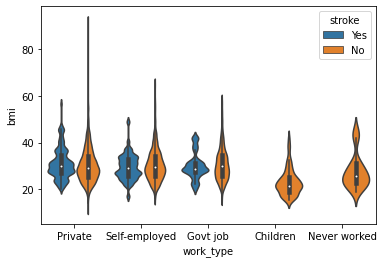

In [158]:
sns.violinplot(y=data_vis["bmi"],x=data_vis["work_type"],hue=data_vis["stroke"])

In [42]:
data_vis.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,63.0,Not had hypertension,Had heart disease,Yes,Private,Rural,228.69,36.6,Smokes,Yes
1,Male,42.0,Not had hypertension,Had heart disease,Yes,Private,Urban,105.92,32.5,Never smoked,Yes
2,Female,61.0,Not had hypertension,Not had heart disease,Yes,Private,Rural,171.23,34.4,Smokes,Yes
3,Male,41.0,Had hypertension,Not had heart disease,Yes,Self-employed,Urban,174.12,24.0,Never smoked,Yes
4,Male,85.0,Not had hypertension,Not had heart disease,Yes,Private,Rural,186.21,29.0,Smokes,Yes


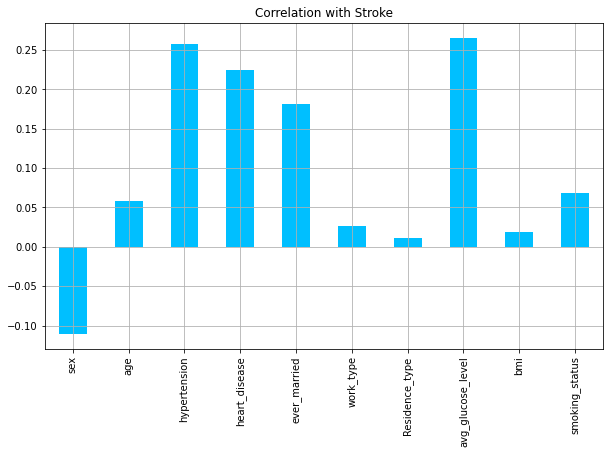

In [28]:
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="deepskyblue");

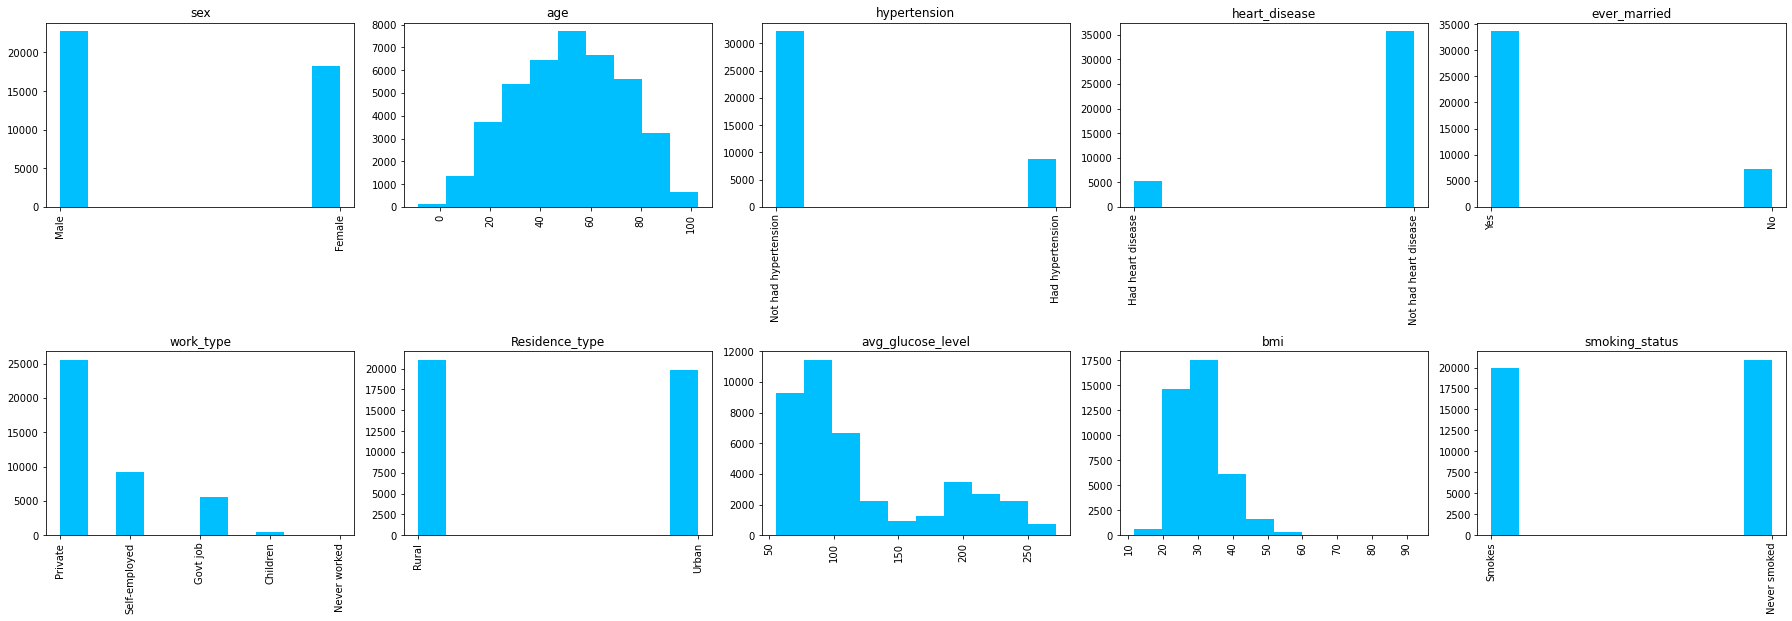

In [47]:
# All data columns except for color
feature_cols = [x for x in data_vis.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(data_vis[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

In [48]:
data = data.drop(data[data.age < 0].index)
data_vis = data_vis.drop(data_vis[data_vis.age < 0].index)
len(data. index)

40849

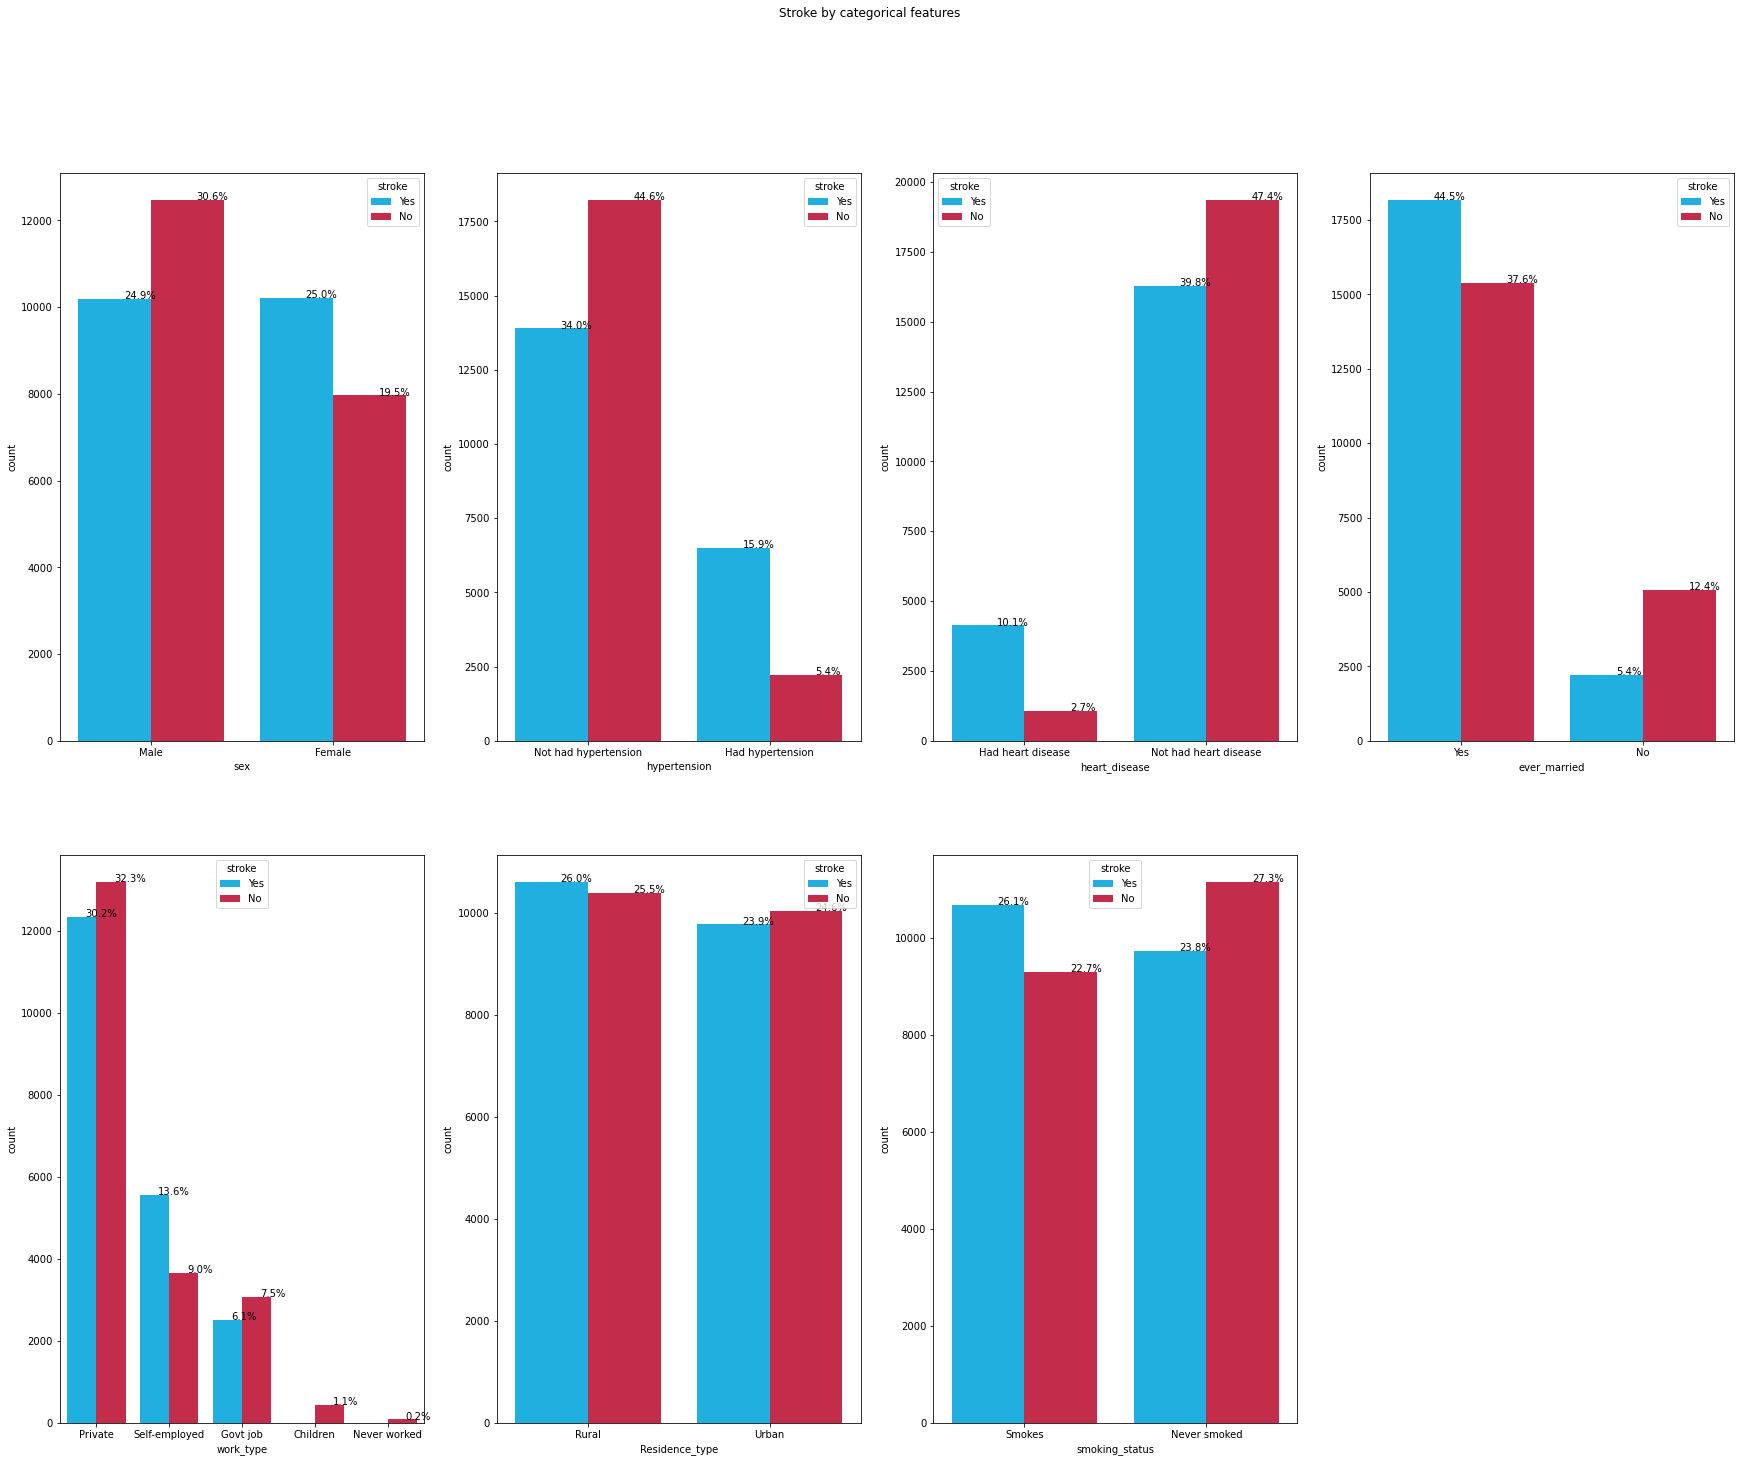

In [49]:
features = [x for x in data_vis.columns if x not in ['stroke','bmi','age','avg_glucose_level']]
plt.figure(figsize = (30,23))
plt.suptitle('Stroke by categorical features')
#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)
    x = sns.countplot(i[1] ,hue='stroke', data=data_vis, palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data_vis.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))


In [53]:
data_pairplot = data.copy()
float_columns = [x for x in data.columns if x in ['bmi','age','avg_glucose_level']]

sc = StandardScaler()
data_pairplot[float_columns] = sc.fit_transform(data_pairplot[float_columns])
data_pairplot.head(4)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.538271,0,1,1,4,1,1.852490,0.906191,1,1
1,1.0,-0.436528,0,1,1,4,0,-0.280621,0.306375,0,1
2,0.0,0.445433,0,0,1,4,1,0.854131,0.584338,1,1
3,1.0,-0.482947,1,0,1,3,0,0.904344,-0.937145,0,1


In [54]:
bmi = pd.cut( data_vis['bmi'],bins=[0,18.5,25,30,35,max(data_vis['bmi'])],labels=['Underweight','Normal','Overweight','Obesity','Extremly Obesity'])
bmi_temp = pd.crosstab(data_vis['stroke'],bmi,rownames=['Stroke'])
bmi_temp = bmi_temp.astype(float)
bmi_temp

bmi,Underweight,Normal,Overweight,Obesity,Extremly Obesity
Stroke,,,,,
No,322.0,4612.0,6454.0,4605.0,4454.0
Yes,118.0,3689.0,7280.0,5145.0,4170.0


In [55]:
data.work_type[data['work_type'] == 2] = 'Govt job'
data.work_type[data['work_type'] == 3] = 'Self-employed'
data.work_type[data['work_type'] == 4] = 'Private'
one_hot_encode_cols = ['work_type']  # filtering by string categoricals
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_0,work_type_1,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,63.0,0,1,1,1,228.69,36.6,1,1,0,0,0,1,0
1,1.0,42.0,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0
2,0.0,61.0,0,0,1,1,171.23,34.4,1,1,0,0,0,1,0
3,1.0,41.0,1,0,1,0,174.12,24.0,0,1,0,0,0,0,1
4,1.0,85.0,0,0,1,1,186.21,29.0,1,1,0,0,0,1,0


In [56]:
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067865,False
avg_glucose_level,0.945126,True
bmi,1.077175,True


In [57]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data[['bmi']] = qt.fit_transform(data[['bmi']])
data[['avg_glucose_level']] = qt.fit_transform(data[['avg_glucose_level']])

In [58]:
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_0,work_type_1,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,63.0,0,1,1,1,1.489816,0.972783,1,1,0,0,0,1,0
1,1.0,42.0,0,1,1,0,0.194619,0.502621,0,1,0,0,0,1,0
2,0.0,61.0,0,0,1,1,0.685567,0.727477,1,1,0,0,0,1,0
3,1.0,41.0,1,0,1,0,0.695130,-0.997262,0,1,0,0,0,0,1
4,1.0,85.0,0,0,1,1,0.784297,-0.052769,1,1,0,0,0,1,0


In [59]:
sc = StandardScaler()
data[['bmi']] = sc.fit_transform(data[['bmi']])
data[['age']] = sc.fit_transform(data[['age']])
data[['avg_glucose_level']] = sc.fit_transform(data[['avg_glucose_level']])
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_0,work_type_1,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,0.538271,0,1,1,1,1.446300,0.973294,1,1,0,0,0,1,0
1,1.0,-0.436528,0,1,1,0,0.183884,0.502922,0,1,0,0,0,1,0
2,0.0,0.445433,0,0,1,1,0.662407,0.727878,1,1,0,0,0,1,0
3,1.0,-0.482947,1,0,1,0,0.671727,-0.997635,0,1,0,0,0,0,1
4,1.0,1.559489,0,0,1,1,0.758638,-0.052718,1,1,0,0,0,1,0


In [60]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [62]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [63]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

In [65]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [1,0.8,0.5,0.1, 0.01]}
AB = AdaBoostClassifier(DecisionTreeClassifier(max_features=4))
# defining parameter range
gridAB = GridSearchCV(AB,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# fitting the model for grid search
gridAB.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4)),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [66]:
print(gridRF.best_params_)

{'n_estimators': 150}


In [67]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)

In [68]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0
0.9965877902232773


In [72]:
resultsRF = train_evaluate_model(y_test)
resultsRF

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
0,0.996588,0.996604,0.993231,1.0,0.996583,0.996583


In [183]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_pred_test # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [75]:
results = train_evaluate_model(y_test)
results.index = ['random forest - Method 1']
results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
random forest - Method 1,0.996588,0.996604,0.993231,1.000000,0.996583,0.996583


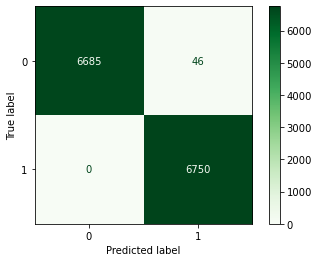

In [76]:
plot_confusion_matrix(gridRF,X_test,y_test,cmap = "Greens")

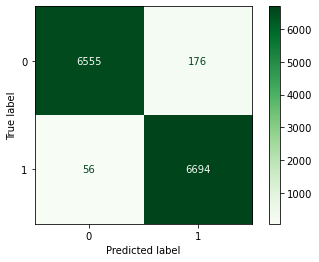

In [79]:
plot_confusion_matrix(gridAB,X_test,y_test,cmap = "Greens")

In [77]:
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_0,work_type_1,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,0.538271,0,1,1,1,1.446300,0.973294,1,1,0,0,0,1,0
1,1.0,-0.436528,0,1,1,0,0.183884,0.502922,0,1,0,0,0,1,0
2,0.0,0.445433,0,0,1,1,0.662407,0.727878,1,1,0,0,0,1,0
3,1.0,-0.482947,1,0,1,0,0.671727,-0.997635,0,1,0,0,0,0,1
4,1.0,1.559489,0,0,1,1,0.758638,-0.052718,1,1,0,0,0,1,0


In [197]:
import pickle


In [101]:
with open("D:\graduation project data\stroke1","wb") as f:
    pickle.dump(gridRF,f)

In [102]:
with open("D:\graduation project data\stroke1","rb") as f:
    model = pickle.load(f)


In [109]:
y_pred_test = model.predict(X_test)
y_pred_test[0:5]

array([0, 1, 1, 1, 1])

In [104]:
print("hellpo")

hellpo


In [107]:
probs=gridRF.predict_proba(X_test[0:5])

In [108]:
probs

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.01333333, 0.98666667],
       [0.02      , 0.98      ],
       [0.01333333, 0.98666667]])

In [113]:
from sklearn.pipeline import make_pipeline


In [115]:
data_v=pd.read_csv("C:\\Users\\NoteBooK\Desktop\graduation project data\stroke_data.csv")

In [116]:
data_v.sex[data_v['sex'] == 0] = 'Female'
data_v.sex[data_v['sex'] == 1] = 'Male'

data_v.hypertension[data_v['hypertension'] == 0] = 'Not had hypertension'
data_v.hypertension[data_v['hypertension'] == 1] = 'Had hypertension'

data_v.heart_disease[data_v['heart_disease'] == 0] = 'Not had heart disease'
data_v.heart_disease[data_v['heart_disease'] == 1] = 'Had heart disease'

data_v.ever_married[data_v['ever_married'] == 0] = 'No'
data_v.ever_married[data_v['ever_married'] == 1] = 'Yes'

data_v.work_type[data_v['work_type'] == 0] = 'Never worked'
data_v.work_type[data_v['work_type'] == 1] = 'Children'
data_v.work_type[data_v['work_type'] == 2] = 'Govt job'
data_v.work_type[data_v['work_type'] == 3] = 'Self-employed'
data_v.work_type[data_v['work_type'] == 4] = 'Private'

data_v.Residence_type[data_v['Residence_type'] == 0] = 'Urban'
data_v.Residence_type[data_v['Residence_type'] == 1] = 'Rural'

data_v.smoking_status[data_v['smoking_status'] == 0] = 'Never smoked'
data_v.smoking_status[data_v['smoking_status'] == 1] = 'Smokes'

data_v.stroke[data_v['stroke'] == 0] = 'No'
data_v.stroke[data_v['stroke'] == 1] = 'Yes'

In [117]:
data_v.dropna(inplace=True)


In [119]:
pipline =make_pipeline(
    OneHotEncoder(),
    QuantileTransformer(n_quantiles=500, output_distribution='normal'),
    RandomForestClassifier(
        oob_score=True, 
        random_state=42, 
        warm_start=True,
        n_jobs=-1,
        n_estimators=400                 
                          )


)

In [118]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
quntile_tranformer = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data_v[['bmi']] = quntile_tranformer.fit_transform(data_v[['bmi']])
data_v[['avg_glucose_level']] = quntile_tranformer.fit_transform(data_v[['avg_glucose_level']])

In [138]:
On=OneHotEncoder(sparse=False).fit(data_v[['work_type']])

In [162]:
data_vis.columns.to_list()

['sex',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [166]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [212]:
categorical_columns=["work_type"]
categorical_transformer=Pipeline(steps=
   [ ("One_Hot",OneHotEncoder())]
)

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
numerical_transformer=Pipeline(steps=[
    ('quantile', QuantileTransformer(n_quantiles=500, output_distribution='normal')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ])
Fin_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("calsifier",RandomForestClassifier(
        oob_score=True, 
        random_state=42, 
        warm_start=True,
        n_jobs=-1,
        n_estimators=400                 
                          )
)
])


In [172]:
data_vis.dropna(inplace=True)

In [176]:
X=data_vis.drop(columns="stroke")
Y=data_vis["stroke"]
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [178]:
Final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('One_Hot',
                                                                   OneHotEncoder())]),
                                                  ['work_type']),
                                                 ('num',
                                                  Pipeline(steps=[('quantile',
                                                                   QuantileTransformer(n_quantiles=500,
                                                                                       output_distribution='normal')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi'])])),
             

In [184]:
predictions=Final_pipeline.predict(X_test)

In [180]:
y_pred_test = Final_pipeline.predict(X_test)
y_pred_train = Final_pipeline.predict(X_train)

In [181]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0
0.9862913096695226


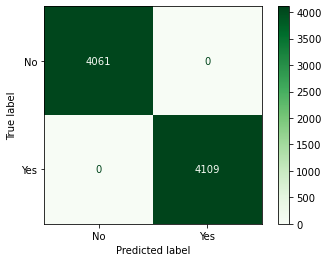

In [214]:
plot_confusion_matrix(Fin_pipeline,X_test,y_test,cmap = "Greens")

In [209]:
recall = recall_score(Y, Final_pipeline.predict(X), pos_label='Yes')


In [210]:
recall

0.628320752867366

In [192]:
y_test

25224     No
18712    Yes
18996    Yes
14196    Yes
8615     Yes
        ... 
4246     Yes
7277     Yes
27354     No
28276     No
19069    Yes
Name: stroke, Length: 8170, dtype: object

In [195]:
Final_pipeline.predict_proba(X_test)

array([[0.9675, 0.0325],
       [0.    , 1.    ],
       [0.0075, 0.9925],
       ...,
       [0.875 , 0.125 ],
       [0.9775, 0.0225],
       [0.105 , 0.895 ]])

In [200]:
Final_pipeline.fit(X_test,y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('One_Hot',
                                                                   OneHotEncoder())]),
                                                  ['work_type']),
                                                 ('num',
                                                  Pipeline(steps=[('quantile',
                                                                   QuantileTransformer(n_quantiles=500,
                                                                                       output_distribution='normal')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi'])])),
             

In [215]:
with open("D:\graduation project data\Final_Stroke_Pipline","wb") as f:
    pickle.dump(Fin_pipeline,f)

In [213]:
Fin_pipeline.fit(X,Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('One_Hot',
                                                                   OneHotEncoder())]),
                                                  ['work_type']),
                                                 ('num',
                                                  Pipeline(steps=[('quantile',
                                                                   QuantileTransformer(n_quantiles=500,
                                                                                       output_distribution='normal')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi'])])),
             